# COMPLEX ENGINEERING PROBLEM - MACHINE LEARNING

INSTRUCTOR: Dr. Hammad Afzal  
COURSE CODE: CS-471  
SEMESTER: 7th (Fall, 2023)   
Credit Hours: 03 (Theory) + 1 (Lab)  

**NAME: Ahmed Mujtaba Butt**  
**COURSE: BESE-26C**  

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('Employee-Attrition-Dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Preprocessing

In [4]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [5]:
# Handle missing data by either imputation or removal of incomplete records
X.columns[X.isna().any()].tolist()

[]

In [6]:
# Encode categorical variables appropriately
labeler = LabelEncoder()
y_labeled = labeler.fit_transform(y)
y = pd.DataFrame(y_labeled, columns=['Attrition'])

In [7]:
# Encode categorical variables appropriately
encoder = OneHotEncoder(sparse_output=False)
cat_cols = X.select_dtypes(exclude='number').columns
X_encoded = encoder.fit_transform(X[cat_cols])
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(cat_cols))

In [8]:
# Scale numerical features to ensure uniformity
scaler = StandardScaler()
num_cols = X.select_dtypes(include='number').columns
X_scaled = scaler.fit_transform(X[num_cols])
X_scaled = pd.DataFrame(X_scaled, columns=num_cols)

In [9]:
# Explore and handle any outliers or anomalies in the data
z_scores = np.abs(zscore(X_scaled))
X_scaled.mask(z_scores.abs()>3, X_scaled.median(), axis=1, inplace=True)

In [10]:
df = pd.concat([X_scaled, X_encoded, y], axis=1)
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,Attrition
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0


## Exploratory Data Analysis (EDA)

In [11]:
# Conduct a thorough analysis of the dataset to understand its characteristics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,Attrition
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1470.0,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000
mean,-3.504377e-17,5.075305e-17,4.350262e-17,7.008755e-17,0.0,-1.546760e-16,1.305078e-16,1.691768e-16,6.525392e-17,-2.658493e-17,...,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728,1.0,0.717007,0.282993,0.161224
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,0.0,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,...,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530,0.0,0.450606,0.450606,0.367863
min,-2.072192e+00,-1.736576e+00,-1.010909e+00,-1.868426e+00,0.0,-1.701283e+00,-1.575686e+00,-1.766079e+00,-2.432006e+00,-9.614864e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,-7.581700e-01,-8.366616e-01,-8.875151e-01,-8.916883e-01,0.0,-8.866700e-01,-6.605307e-01,-8.803615e-01,-1.026167e+00,-9.614864e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
50%,-1.011589e-01,-1.204135e-03,-2.705440e-01,8.504925e-02,0.0,-7.253514e-03,2.546249e-01,5.355811e-03,3.796721e-01,-5.778755e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000
75%,6.653541e-01,8.788772e-01,5.932157e-01,1.061787e+00,0.0,8.821327e-01,1.169781e+00,8.787715e-01,3.796721e-01,8.459113e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000
max,2.526886e+00,1.726730e+00,2.444129e+00,2.038524e+00,0.0,1.733302e+00,1.169781e+00,1.678377e+00,1.785511e+00,2.653309e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


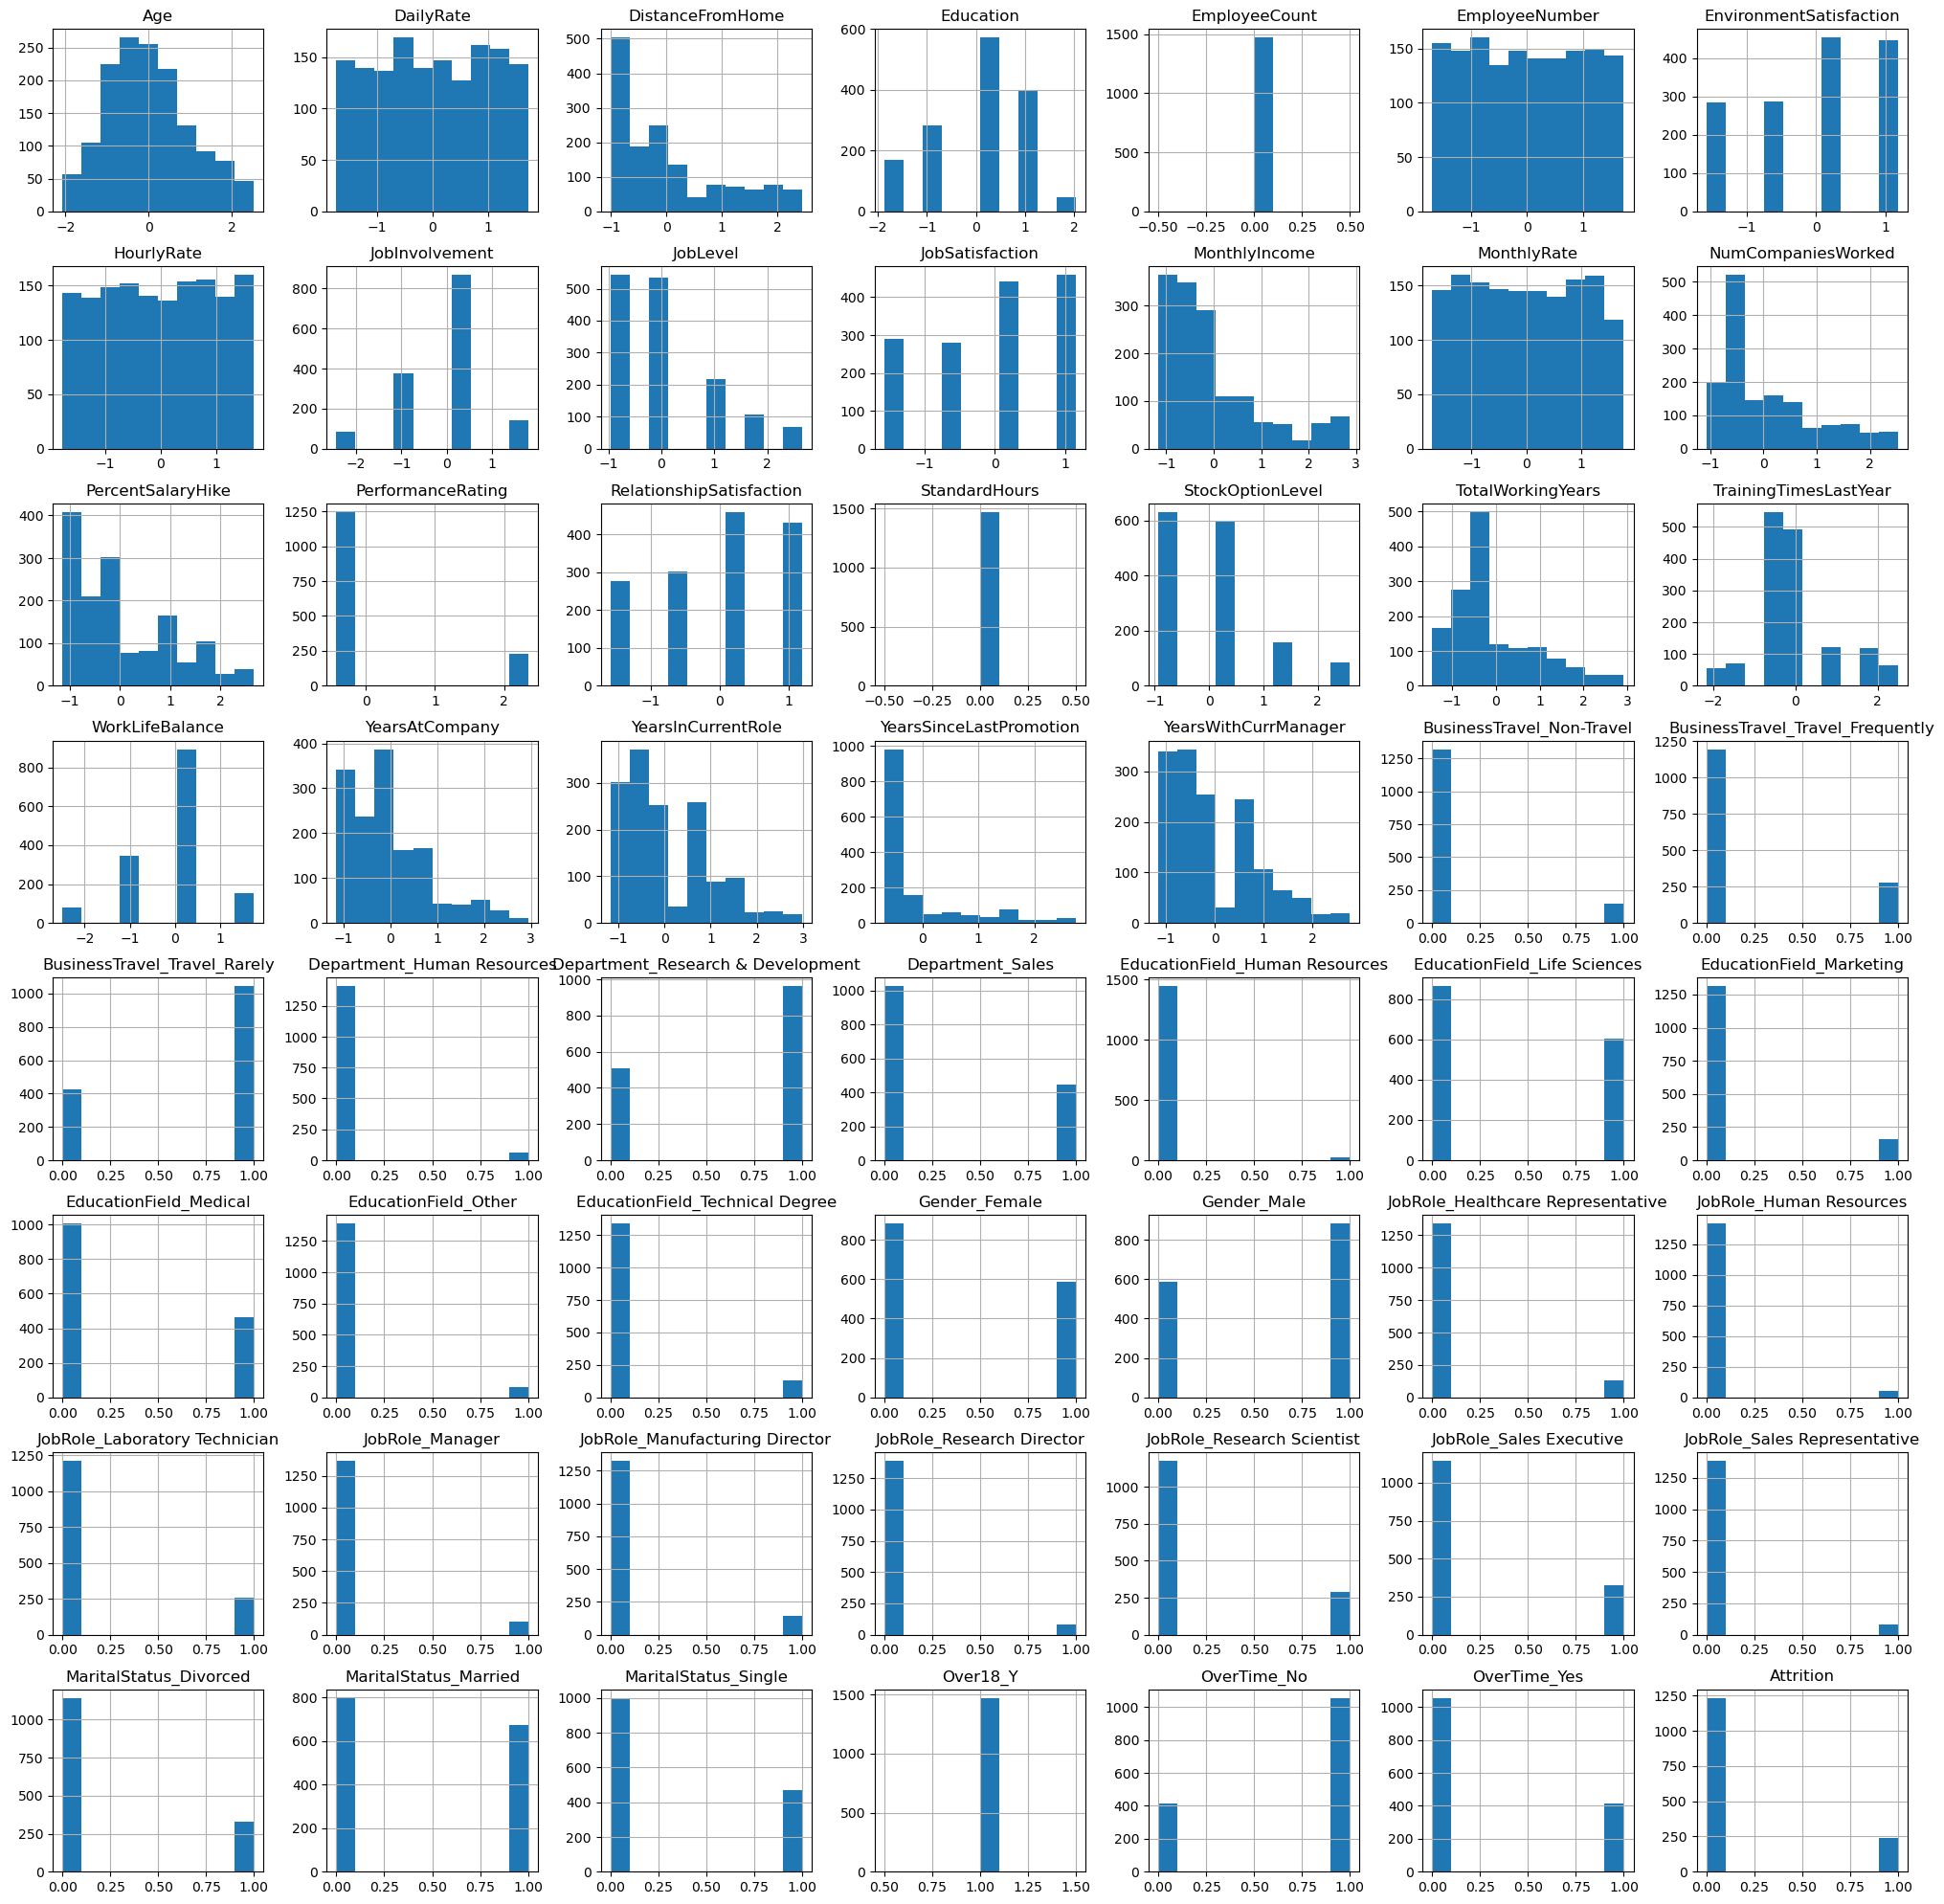

In [12]:
# Visualize the distribution of employees with respect to different features
df.hist(figsize=(25,25))
plt.show()

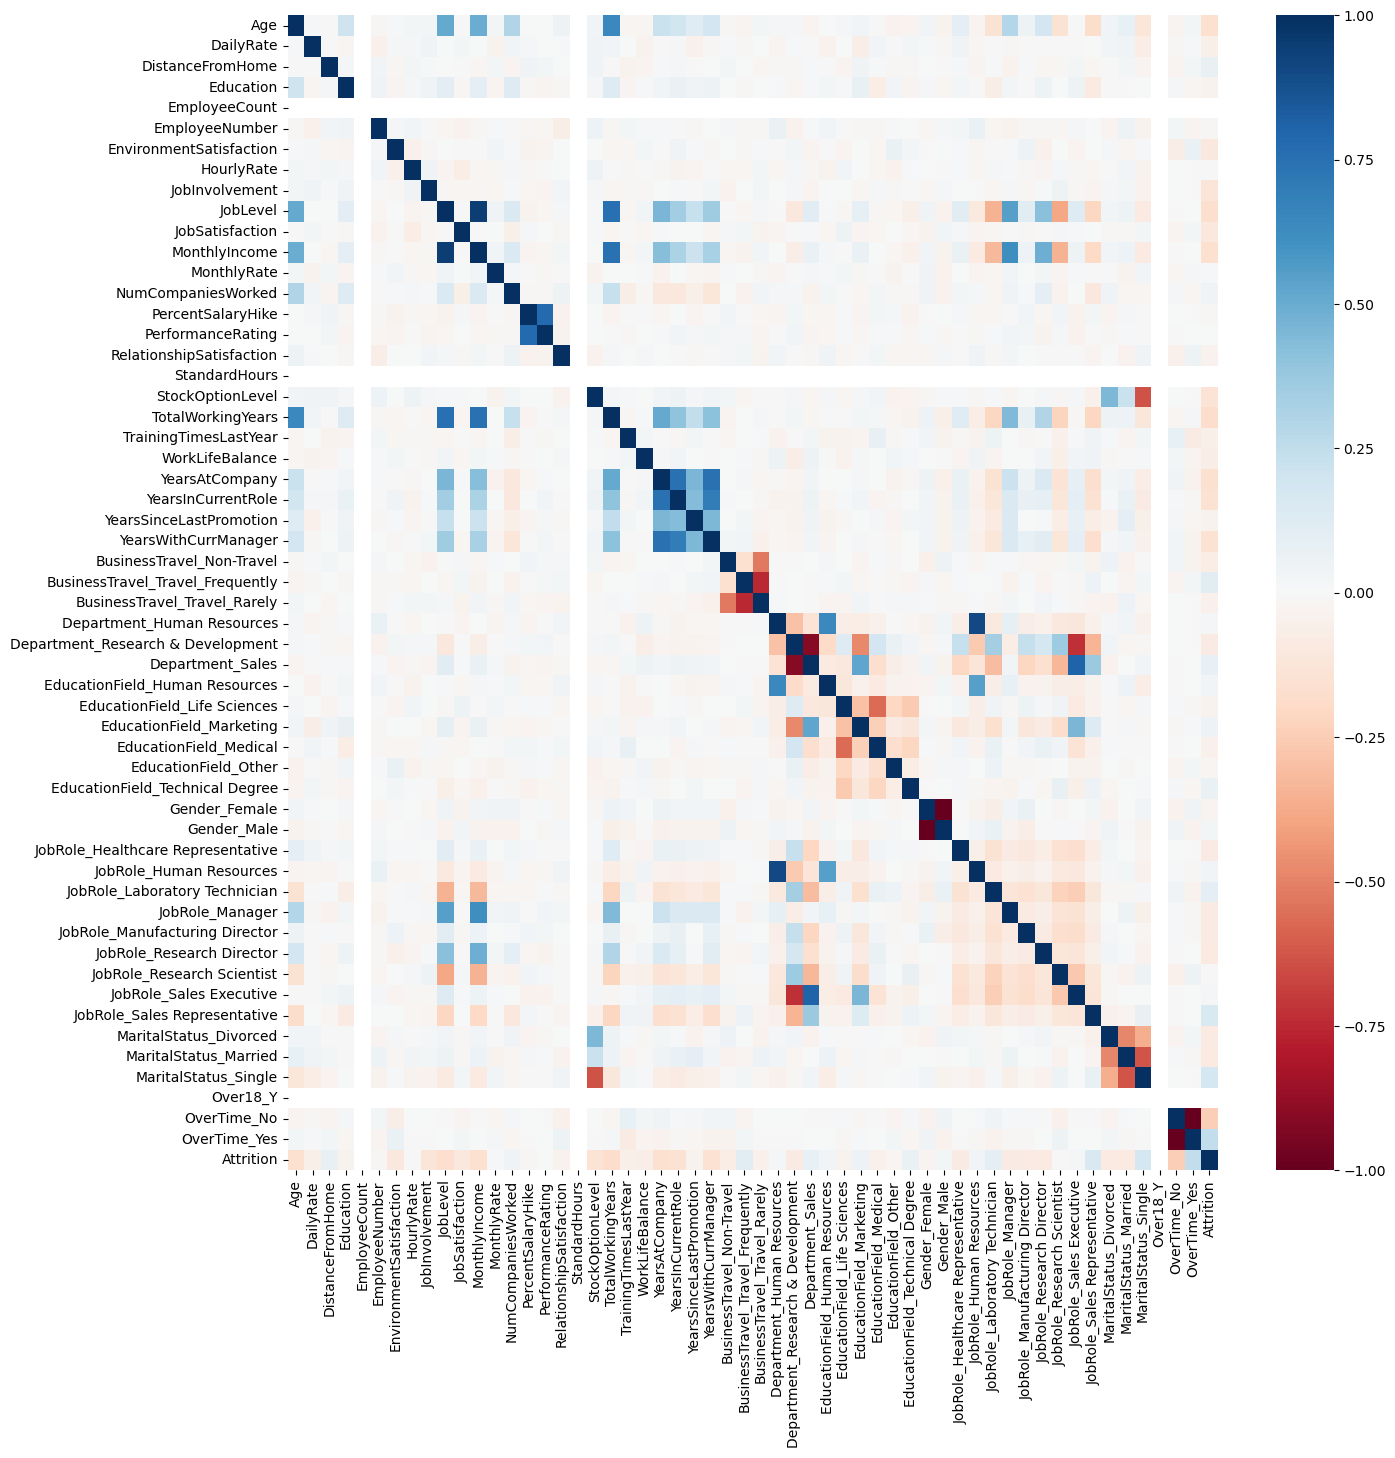

In [13]:
# Analyze the correlation between various features and attrition
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, cmap="RdBu")
plt.show()

In [14]:
# Identify patterns or trends that may influence employee attrition
df.groupby("Attrition").mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
Attrition,,,,,,,,,,,,,,,,,,,,,
0,0.069799,0.024837,-0.034163,0.013755,0.0,0.004637,0.045319,0.003001,0.057002,0.074139,...,0.063260,0.198702,0.218167,0.040552,0.238443,0.477697,0.283861,1.0,0.765612,0.234388
1,-0.363132,-0.129218,0.177736,-0.071558,0.0,-0.024126,-0.235775,-0.015614,-0.296554,-0.385712,...,0.008439,0.198312,0.240506,0.139241,0.139241,0.354430,0.506329,1.0,0.464135,0.535865


## Attrition Prediction & Model Improvement

In [15]:
# Split the dataset into training and testing sets
X = df.drop("Attrition", axis=1)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Choose an appropriate machine learning algorithm for binary classification
model = LogisticRegression()

In [17]:
# Experiment with different hyperparameters or feature selection techniques to improve model performance
params = {"C": [0.01, 0.1, 1, 10, 100],
          "penalty": ["l1", "l2", "elasticnet", None],
          "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}
grid = GridSearchCV(model, params, cv=5, scoring="f1")

In [18]:
# Train the model on the training set
grid.fit(X_train, y_train)
print('best params:', grid.best_params_, '\nbest score:', grid.best_score_)

best params: {'C': 10, 'penalty': 'l2', 'solver': 'sag'} 
best score: 0.4987415806410995


In [19]:
# Consider using techniques such as cross-validation to fine-tune the model
model = grid.best_estimator_
scores = cross_val_score(model, X, y, cv=10, scoring="f1")
print('scores =', scores, '\nmean score =', np.mean(scores))

scores = [0.72727273 0.47058824 0.52380952 0.44444444 0.51282051 0.34285714
 0.5        0.53658537 0.5        0.63157895] 
mean score = 0.5189956899720549


In [20]:
# Evaluate the model on the testing set and report performance metrics such as accuracy, precision, recall, and F1 score
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.56      0.38      0.45        39

    accuracy                           0.88       294
   macro avg       0.73      0.67      0.69       294
weighted avg       0.86      0.88      0.87       294



## Documentation

[Employee-Attrition-Documentation.pptx](Employee-Attrition-Documentation.pptx)